In [1]:
# pip install imblearn

In [2]:
# pip install ydata_profiling

In [3]:
# pip install xgboost

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor
import lightgbm as lgb
import xgboost

import optuna

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
# from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

# from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [65]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
train = pd.DataFrame(train)

# EDA

In [7]:
# train.columns = train.columns.str.lower()
# train.head()


In [67]:
train.shape

(90615, 10)

In [8]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [9]:
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [10]:
le = LabelEncoder()
le.fit(train['Sex'])
train['Sex'] = le.transform(train['Sex'])
train.head()
# female, male, infant = 0,2,1

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [11]:
le = LabelEncoder()
le.fit(test['Sex'])
test['Sex'] = le.transform(test['Sex'])
test.head()
# female, male, infant = 0,2,1

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [12]:
test['Sex'].unique()

array([2, 1, 0])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  int32  
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int32(1), int64(2)
memory usage: 6.6 MB


In [14]:
train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [15]:
train.groupby('Sex').count()
# female, male, infant = 0,2,1


,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
Sex,,,,,,,,,
0,26495,26495,26495,26495,26495,26495,26495,26495,26495
1,33093,33093,33093,33093,33093,33093,33093,33093,33093
2,31027,31027,31027,31027,31027,31027,31027,31027,31027


In [16]:
# df.groupby('sex').mean()

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Length'}>],
       [<Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>],
       [<Axes: title={'center': 'Whole weight.1'}>,
        <Axes: title={'center': 'Whole weight.2'}>,
        <Axes: title={'center': 'Shell weight'}>],
       [<Axes: title={'center': 'Rings'}>, <Axes: >, <Axes: >]],
      dtype=object)

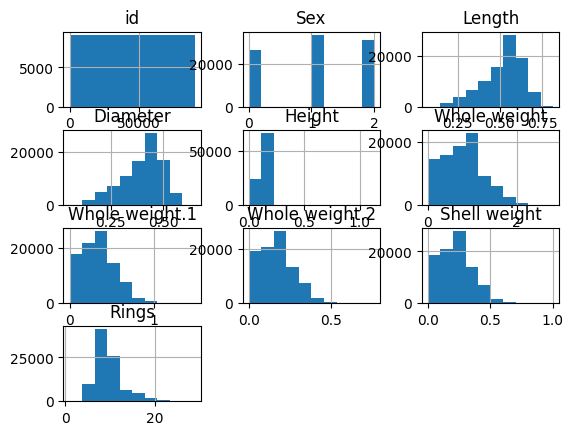

In [17]:
train.hist()

In [18]:
# fig, axes = plt.subplots(4, 4, figsize = (15,12))

# for i, col in enumerate(df.columns):
#     r = i//4
#     c = i%4
#     axes[r][c].set_title(col)
#     sns.histplot(data = df, x = col, ax = axes[r][c] ,kde =True )
# plt.tight_layout()
# plt.show()


In [19]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


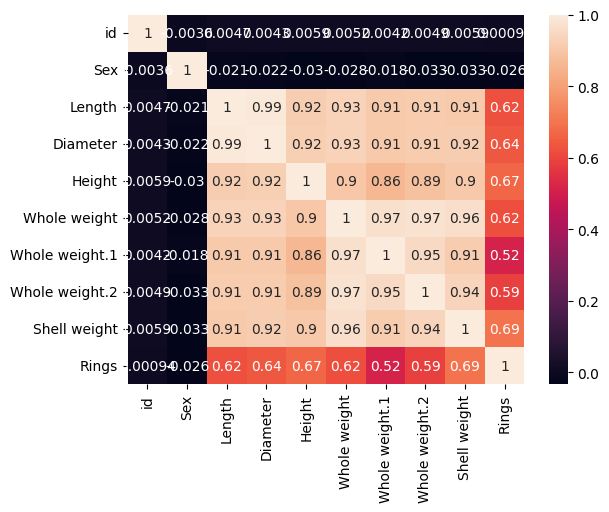

In [20]:
sns.heatmap(train.corr(), annot=True)
plt.show()

# 아웃라이어

In [21]:
# 정규화  -> 'whole weight','whole weight.1', 'whole weight.2', 'shell weight'

In [22]:
# for col, ser in df.iteritems():
#     print(ser)
#     print(type(col), type(ser), ser.shape, '\n---\n')


In [23]:
# type(train)

In [24]:
outlier_list = []
for col,ser in train.items():
    q1=ser.quantile(0.25)
    q3=ser.quantile(0.75)
    iqr=q3-q1
    # print(iqr)
    condition1=train[col]>q3+1.5*iqr
    condition2=train[col]<q1-1.5*iqr
    a = train[condition1|condition2].index
    # print(col)
    # print(len(a))
    # print(len(train[condition1|condition2]))
    outlier_list.extend(a)
    # print(a)

In [25]:
len(outlier_list)

11765

In [26]:
# 아웃라이어 중복제거

outlier_list = set(outlier_list)
fin_outlier = list(outlier_list)
len(fin_outlier)

8457

In [27]:
print(len(train))
train.drop(fin_outlier, inplace=True)
print(len(train))

90615
82158


# 정규화

In [28]:
df = pd.concat([train, test], axis=0, ignore_index=True)
train_idx = df.iloc[:train.shape[0], :].index
test_idx  = df.iloc[train.shape[0]:, :].index
df.columns = df.columns.str.lower()

In [29]:
df.describe()

,id,sex,length,diameter,height,whole weight,whole weight.1,whole weight.2,shell weight,rings
count,142569.000000,142569.000000,142569.000000,142569.000000,142569.000000,142569.000000,142569.000000,142569.000000,142569.000000,82158.000000
mean,77313.170374,1.054318,0.516575,0.401022,0.134772,0.773531,0.335912,0.166410,0.220171,9.254631
std,43759.922359,0.789541,0.112282,0.093175,0.035846,0.435672,0.195400,0.096738,0.121971,2.275993
min,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,4.000000
25%,39344.000000,0.000000,0.445000,0.340000,0.110000,0.416500,0.177500,0.086500,0.120000,8.000000
50%,78574.000000,1.000000,0.540000,0.420000,0.140000,0.777500,0.327000,0.163000,0.220000,9.000000
75%,115383.000000,2.000000,0.595000,0.470000,0.160000,1.053000,0.459500,0.227000,0.295000,11.000000
max,151025.000000,2.000000,0.815000,0.650000,1.095000,2.825500,1.488000,0.641500,1.004000,15.000000


In [30]:
sc_col = ['length','diameter','height','whole weight','whole weight.1', 'whole weight.2', 'shell weight']

In [31]:
scaler = StandardScaler()

for col in sc_col:
    res  = scaler.fit_transform(df[col].values.reshape(-1,1))
    df[col] = res
    

In [32]:
df.describe()

,id,sex,length,diameter,height,whole weight,whole weight.1,whole weight.2,shell weight,rings
count,142569.000000,142569.000000,1.425690e+05,1.425690e+05,1.425690e+05,1.425690e+05,1.425690e+05,1.425690e+05,1.425690e+05,82158.000000
mean,77313.170374,1.054318,2.958414e-16,1.228021e-16,1.257326e-15,-8.253258e-17,1.828077e-16,1.594833e-18,1.626729e-16,9.254631
std,43759.922359,0.789541,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,2.275993
min,0.000000,0.000000,-3.932757e+00,-3.713676e+00,-3.759705e+00,-1.770907e+00,-1.713984e+00,-1.715056e+00,-1.792811e+00,4.000000
25%,39344.000000,0.000000,-6.374582e-01,-6.549137e-01,-6.910488e-01,-8.194991e-01,-8.107067e-01,-8.260499e-01,-8.212681e-01,8.000000
50%,78574.000000,1.000000,2.086321e-01,2.036861e-01,1.458574e-01,9.109339e-03,-4.560808e-02,-3.524764e-02,-1.400454e-03,9.000000
75%,115383.000000,2.000000,6.984738e-01,7.403110e-01,7.037949e-01,6.414684e-01,6.324893e-01,6.263385e-01,6.135003e-01,11.000000
max,151025.000000,2.000000,2.657841e+00,2.672161e+00,2.678737e+01,4.709913e+00,5.896061e+00,4.911143e+00,6.426362e+00,15.000000


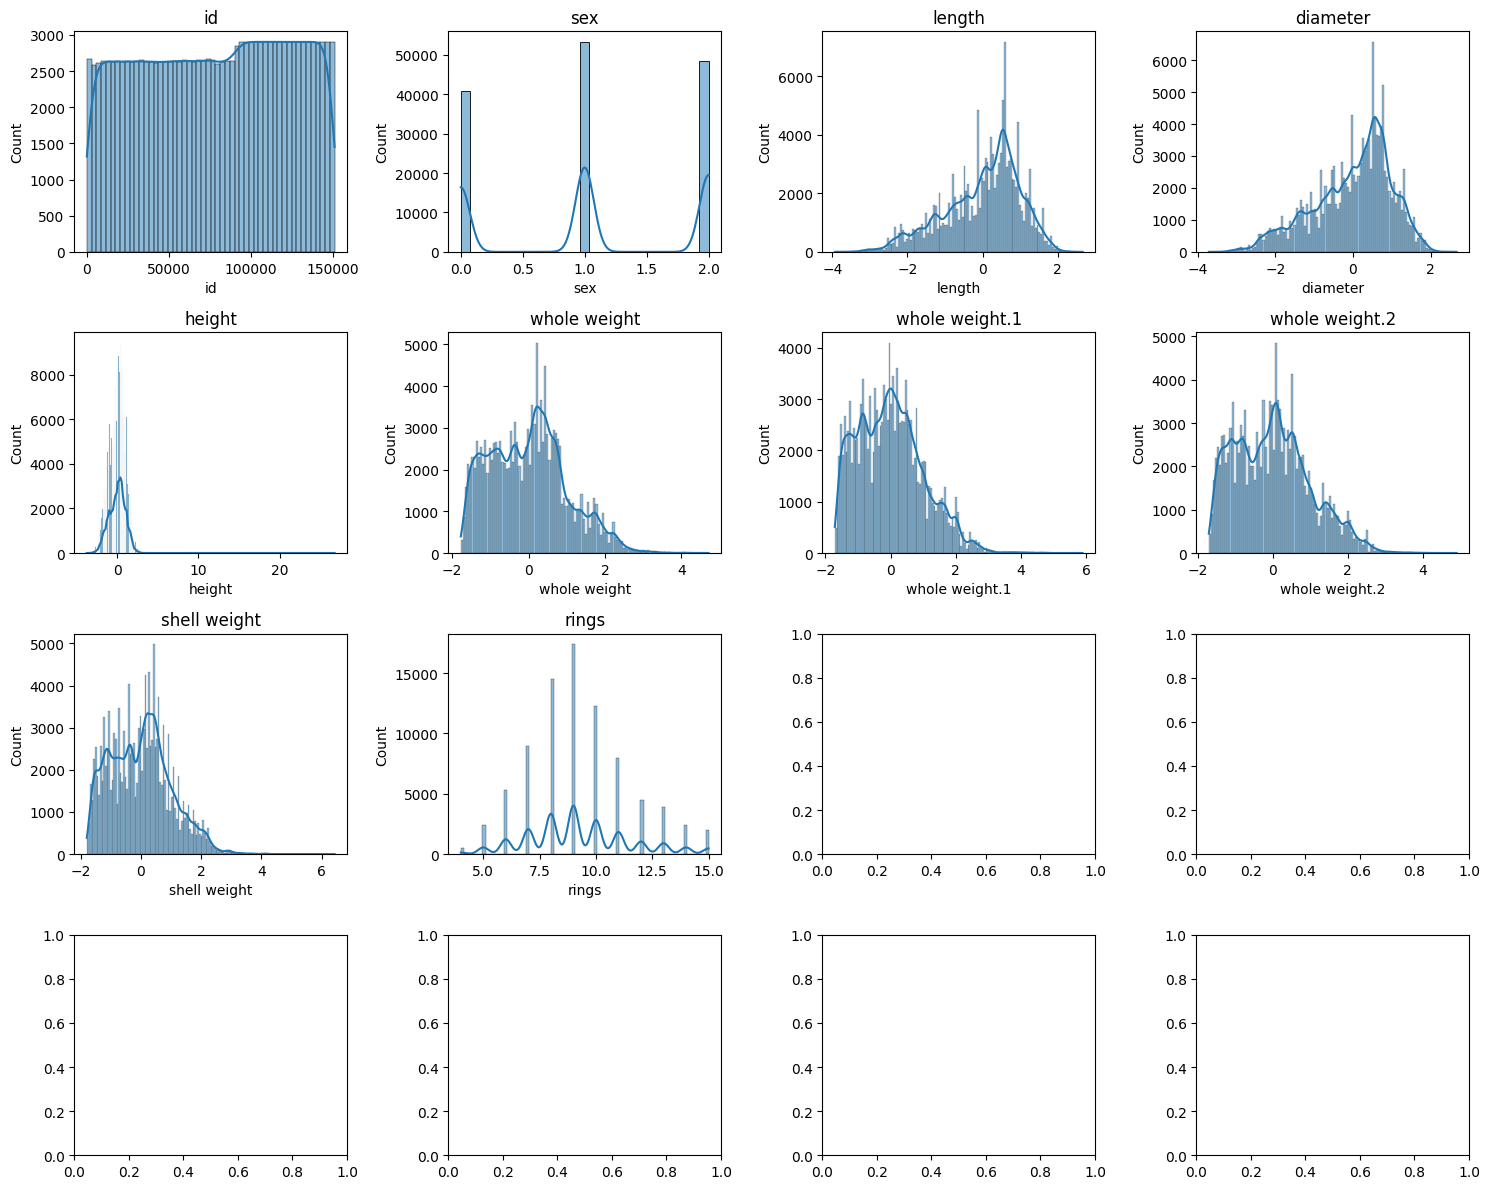

In [33]:
fig, axes = plt.subplots(4, 4, figsize = (15,12))

for i, col in enumerate(df.columns):
    r = i//4
    c = i%4
    axes[r][c].set_title(col)
    sns.histplot(data = df, x = col, ax = axes[r][c] ,kde =True )
plt.tight_layout()
plt.show()


# 모델 학습 및 예측

In [34]:
train = df.loc[train_idx]
test  = df.loc[test_idx]
test = test.reset_index(drop=True)

In [35]:
train.shape,test.shape

((82158, 10), (60411, 10))

In [36]:
test.head()

,id,sex,length,diameter,height,whole weight,whole weight.1,whole weight.2,shell weight,rings
0,90615,2,1.143785,0.793973,0.564311,1.066102,1.446206,1.510176,0.658593,NaN
1,90616,2,0.564881,0.632986,0.703795,0.480796,0.729726,0.548809,0.449527,NaN
2,90617,2,0.386756,0.203686,0.145857,0.151419,0.084894,0.187004,0.166672,NaN
3,90618,2,0.475819,0.954961,0.285342,0.230607,0.084894,0.207679,0.121580,NaN
4,90619,1,-0.904645,-0.815901,-0.691049,-0.953775,-0.913061,-1.027627,-0.944248,NaN


In [37]:
drop_col = ['id','sex','rings']

In [38]:
y = train["rings"]
X = train.drop(drop_col, axis = 1)

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 1)

## 1차
GBR 
1.3710210037433181

In [40]:
gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

<Axes: >

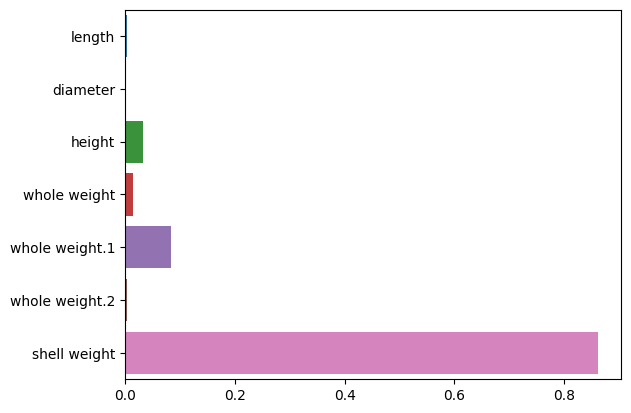

In [41]:
sns.barplot(y=X_train.columns, x=gbr.feature_importances_)

In [42]:
mse=mean_squared_error(y_test,gbr_pred)
np.sqrt(mse)

1.3710210037433181

## 2차
XGB
1.3436773047525556

In [43]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

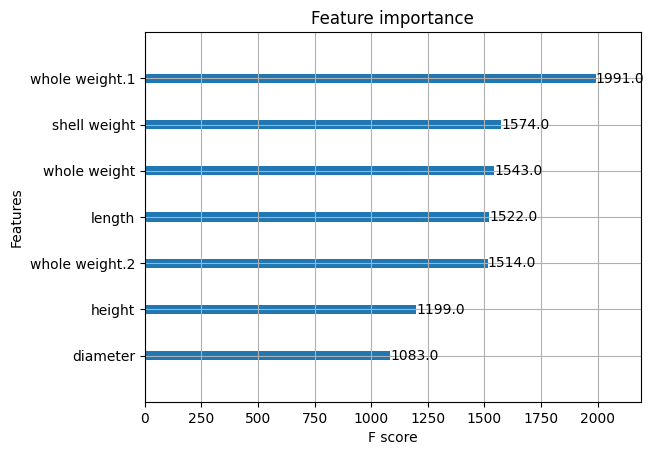

In [44]:
xgboost.plot_importance(xgb_model)

In [45]:
predictions = xgb_model.predict(X_test)
# predictions

In [46]:
mse=mean_squared_error(y_test,predictions)
np.sqrt(mse)

1.3436773047525556

## 3차
XGB + 로그스케일
0.1296437792977807

In [47]:
y = np.log1p(train["rings"])
X = np.log1p( train.drop(drop_col, axis = 1))

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 1)

In [49]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

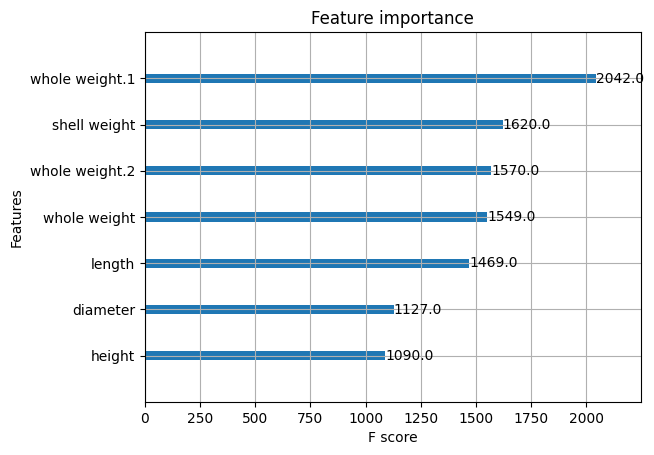

In [50]:
xgboost.plot_importance(xgb_model)

In [51]:
predictions = xgb_model.predict(X_test)

In [52]:
mse=mean_squared_error(y_test,predictions)
np.sqrt(mse)

0.1296437792977807

# 제출

In [53]:
train = np.log1p(train)
test = np.log1p(test)

In [54]:
test.head()

,id,sex,length,diameter,height,whole weight,whole weight.1,whole weight.2,shell weight,rings
0,11.414386,1.098612,0.762573,0.584433,0.447445,0.725664,0.894538,0.920353,0.505970,NaN
1,11.414397,1.098612,0.447810,0.490410,0.532858,0.392580,0.547963,0.437486,0.371237,NaN
2,11.414408,1.098612,0.326967,0.185389,0.136153,0.140995,0.081482,0.171432,0.154156,NaN
3,11.414419,1.098612,0.389213,0.670370,0.251025,0.207508,0.081482,0.188700,0.114738,NaN
4,11.414430,0.693147,-2.350144,-1.692283,-1.174572,-3.074234,-2.442549,NaN,-2.886846,NaN


In [55]:
test.drop(drop_col,axis =1,  inplace=True)

In [56]:
test.head()

,length,diameter,height,whole weight,whole weight.1,whole weight.2,shell weight
0,0.762573,0.584433,0.447445,0.725664,0.894538,0.920353,0.505970
1,0.447810,0.490410,0.532858,0.392580,0.547963,0.437486,0.371237
2,0.326967,0.185389,0.136153,0.140995,0.081482,0.171432,0.154156
3,0.389213,0.670370,0.251025,0.207508,0.081482,0.188700,0.114738
4,-2.350144,-1.692283,-1.174572,-3.074234,-2.442549,NaN,-2.886846


In [57]:
pred = xgb_model.predict(test)
pred = np.expm1(pred)

In [61]:
submit = pd.read_csv('./datasets/sample_submission.csv')
submit = pd.DataFrame(submit)
submit.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


In [62]:
submit['Rings'] = pred
submit.head()

,id,Rings
0,90615,10.004880
1,90616,9.648194
2,90617,9.857175
3,90618,10.498637
4,90619,7.835749


In [64]:
submit.to_csv('./ans1.csv',index =False )